### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis. Describe the data briefly.

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
advance_payments: Amount paid by the customer in advance by cash (in 100s)
probability_of_full_payment: Probability of payment done in full by the customer to the bank
current_balance: Balance amount left in the account to make purchases (in 1000s)
credit_limit: Limit of the amount in credit card (10000s)
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [3]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.getcwd()

'C:\\Users\\612598'

In [5]:
os.chdir("C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Data Mining\\ASSIGNMENT")

In [6]:
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Data Mining\\ASSIGNMENT'

In [7]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

In [8]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


All values above are having data type of int or float, so no need to change Data type

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


by looking at above dataframe, we can see here distribution of data 
is in Different forms like 100s,1000s. so we need scaling to bring all data on same level

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

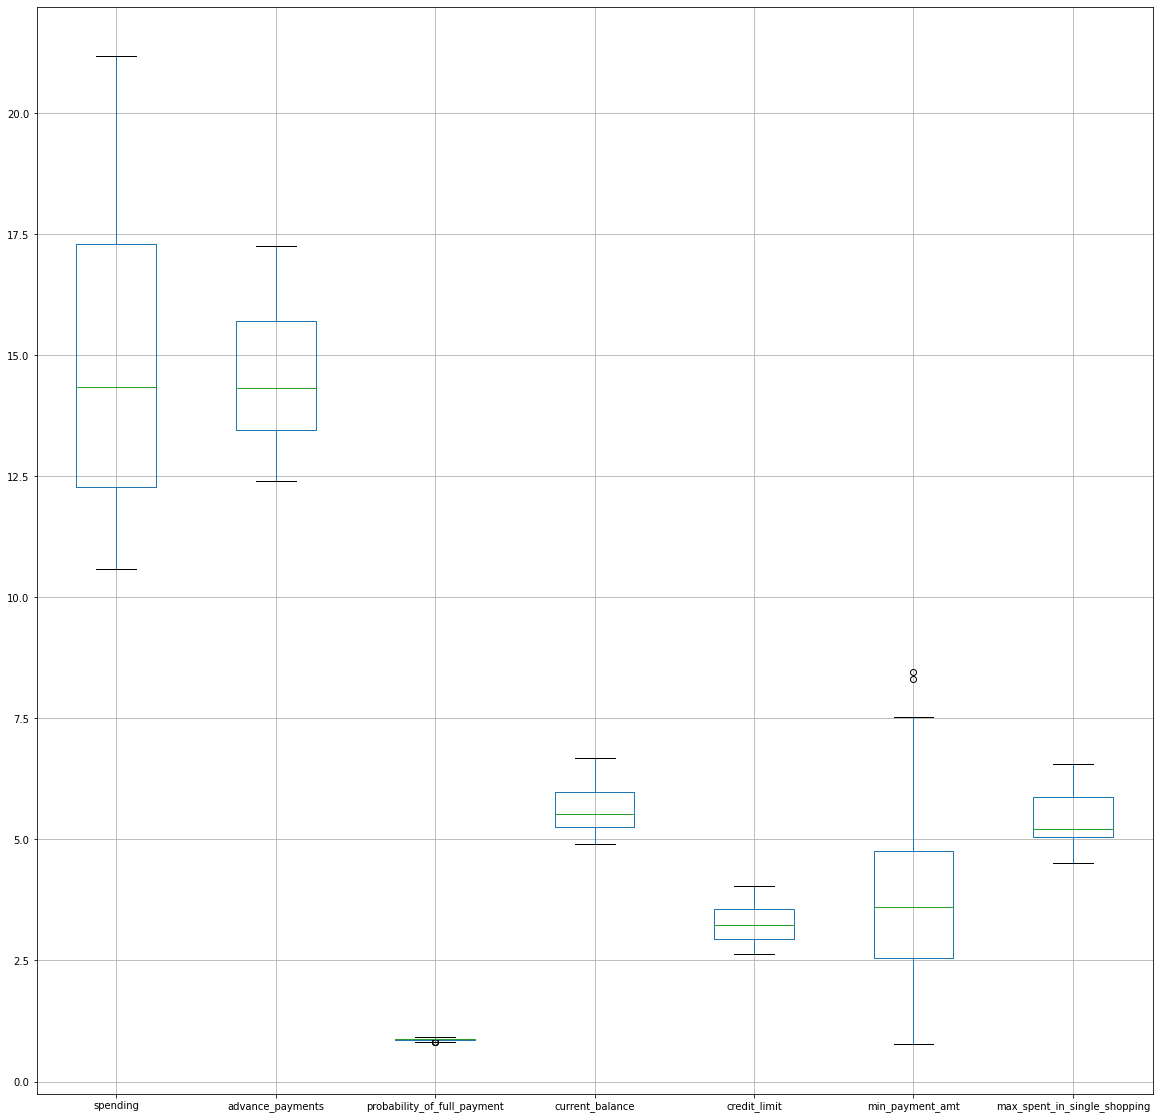

In [13]:
plt.figure(figsize=(20,20))
df[['spending','advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt'
,'max_spent_in_single_shopping']].boxplot()

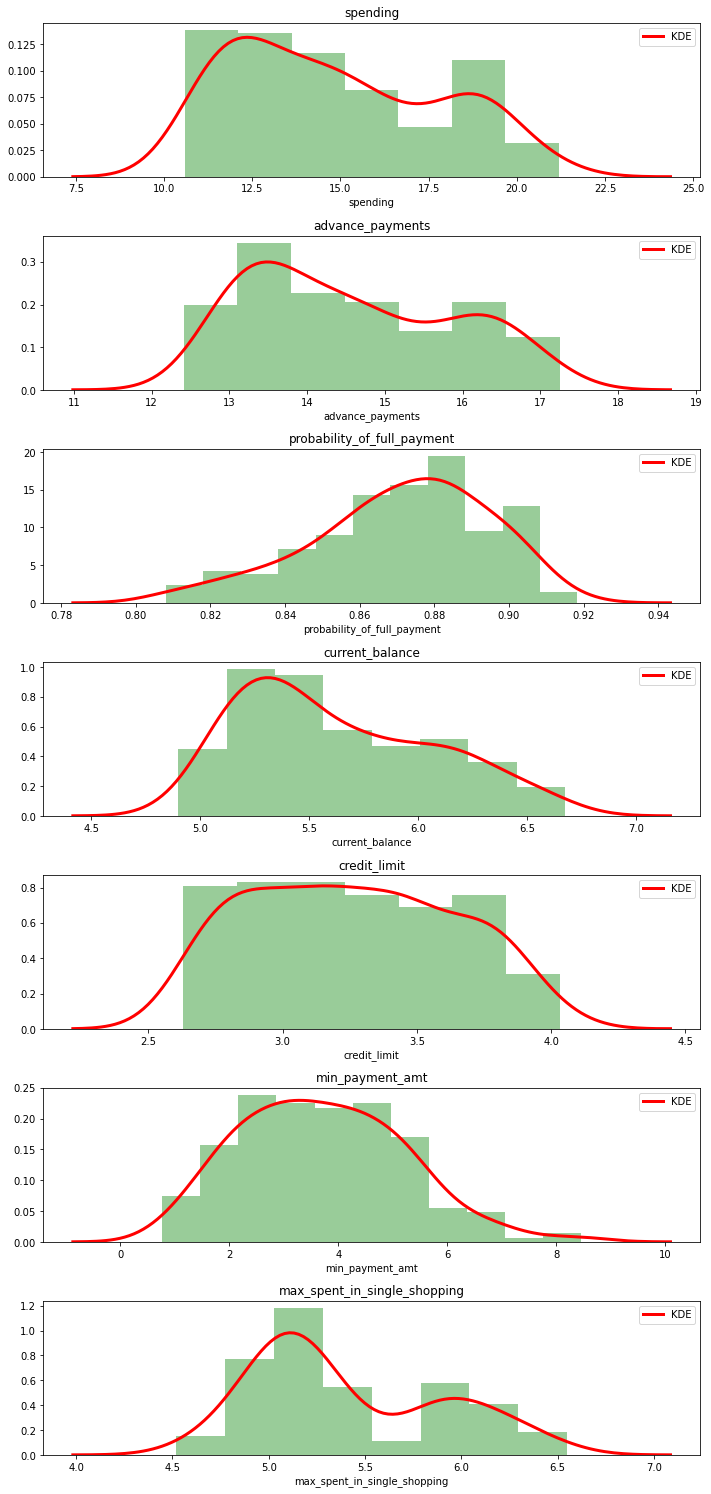

In [14]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

-->Distrubtion is skewed to right tail for all the variable execpt probability_of_full_payment variable, which has left tail

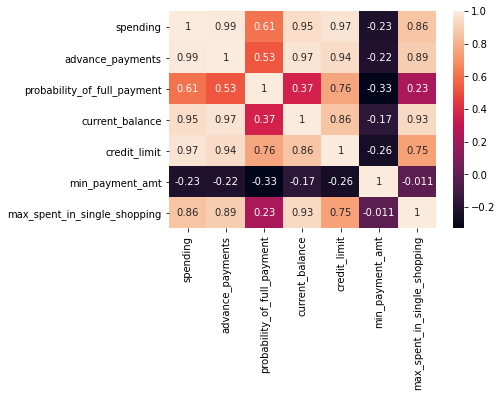

In [15]:
sns.heatmap(df.corr(),annot=True)

As we can see above data we can infer that

-->It does not contain missing values, so no missing value treatment is needed.

-->No Outlier treatment required as no invalid outlier can be detected.

-->From Describe-Summary table, we can see that Standard Deviation for Spending Feature is high as compared to others and For almost all values Mean and Median are same. and things are normally distributed.

<Figure size 720x2880 with 0 Axes>

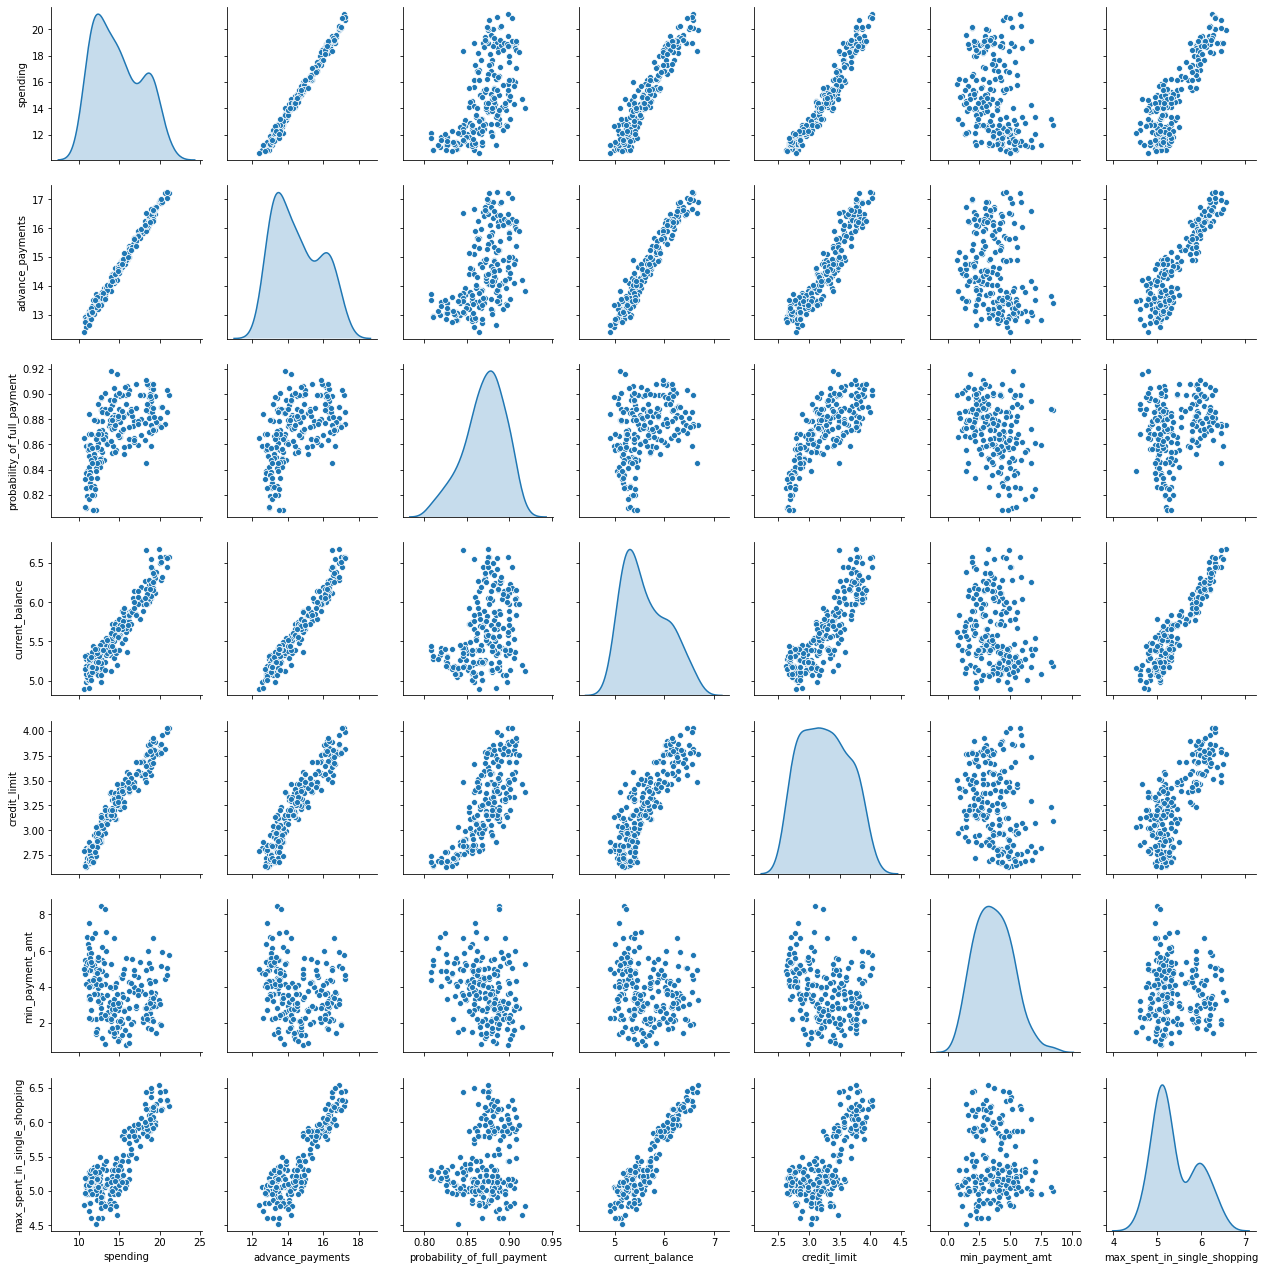

In [16]:
plt.figure(figsize=(10,40))
sns.pairplot(df,diag_kind='kde');

### Few Observations:
   Strong positive correlation between 
   Spending is highly Correlated with Advance Payment, Prob of Full payment, Current Balance, Credit Limit, Max Spent      in Single Shipping.
   
   Advance Payment and Spending, Prob of Full payment, Current Balance, Credit Limit, Max Spent in Single Shipping
   are highly correlated.
   
   Probability of Full payment is highly correlated with Spending, Advance Payment, Current balance, Credit Limit.
   
   Maximum amt spent in Single shopping is highly correlated with Spending, Advance Payment, Current balance, Credit      Limit.

### 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X = StandardScaler()

In [21]:
scaled_df = pd.DataFrame(X.fit_transform(df),columns=df.columns)

In [22]:
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [23]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


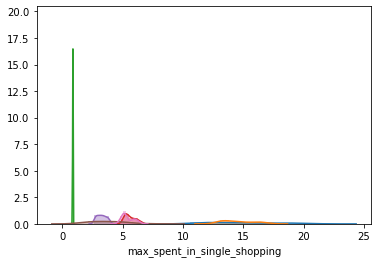

In [24]:
sns.distplot(df["spending"])
sns.distplot(df["advance_payments"])
sns.distplot(df["probability_of_full_payment"])
sns.distplot(df["current_balance"])
sns.distplot(df["credit_limit"])
sns.distplot(df["min_payment_amt"])
sns.distplot(df["max_spent_in_single_shopping"])

By observing above plot we do not have common scale and Normal Distribution cannot be seen in above Graph

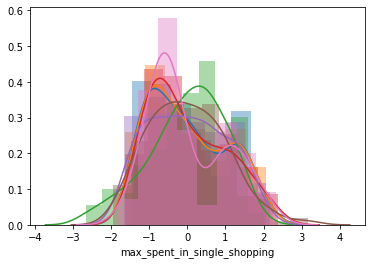

In [25]:

sns.distplot(scaled_df["spending"])
sns.distplot(scaled_df["advance_payments"])
sns.distplot(scaled_df["probability_of_full_payment"])
sns.distplot(scaled_df["current_balance"])
sns.distplot(scaled_df["credit_limit"])
sns.distplot(scaled_df["min_payment_amt"])
sns.distplot(scaled_df["max_spent_in_single_shopping"])

By looking at Above graph, it seems that all values are in same platform, and shows scaled data with almost Normal Distribution.The given data is arranged in 100's 1000's so it is mandatory to bring all features on same table.
So it is right to apply various clustering techniques.

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
link_method = linkage(scaled_df, method = 'average')

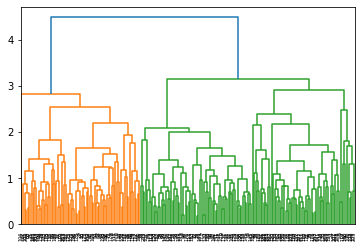

In [62]:
dend = dendrogram(link_method)

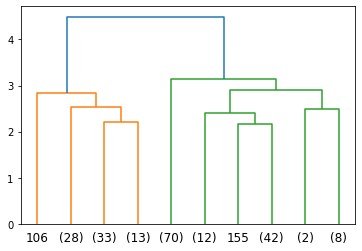

In [65]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

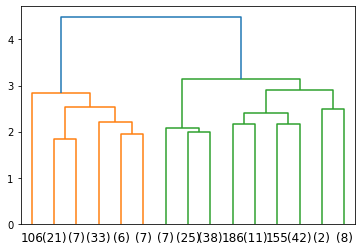

In [67]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 15)

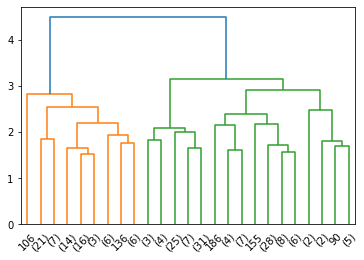

In [68]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [69]:
from scipy.cluster.hierarchy import fcluster

In [70]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [73]:
df_Clust=scaled_df.copy()

In [76]:
df_Clust['Cluster of 3 sets']=clusters_3

In [80]:
df_Clust.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Cluster of 3 sets
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,3
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [81]:
df_Clust["Cluster of 3 sets"].value_counts().sort_index()

1    75
2    70
3    65
Name: Cluster of 3 sets, dtype: int64

By above Classification and little domain expertise we can differentiate these data between 3 clusters High/Low/medium.
That will be perfect for Customer Segmentation


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [82]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [83]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [84]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [85]:
k_means.inertia_

659.171754487041

In [86]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [87]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [88]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

371.38509060801096

In [89]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

327.21278165661346

In [29]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

289.31599538959495

In [30]:
wss =[] 

In [31]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [32]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694]

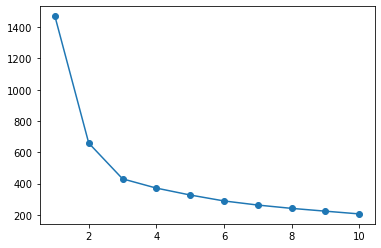

In [33]:
plt.plot(range(1,11), wss, 'o-');

From the above graph, the number of optimal clusters could be 3 or 4

In [38]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [40]:
silhouette_score(scaled_df,labels,random_state=1)

0.4007270552751299

In [41]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels4 = k_means.labels_

In [42]:
silhouette_score(scaled_df,labels4,random_state=1)

0.3276547677266193

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

Appending Clusters to the original dataset

In [100]:
silhouette_score(scaled_df,labels,random_state=1)

0.3276547677266193

In [111]:
df["Clus_kmeans3"] = labels3
df.head(100)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2
...,...,...,...,...,...,...,...,...
95,18.43,15.97,0.9077,5.980,3.771,2.984,5.905,2
96,19.57,16.74,0.8779,6.384,3.772,1.472,6.273,2
97,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2
98,10.82,12.83,0.8256,5.180,2.630,4.853,5.089,1


In [112]:
df.Clus_kmeans3.value_counts().sort_index()

0    71
1    72
2    67
Name: Clus_kmeans3, dtype: int64

In [113]:
clust_profile=df
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67


### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

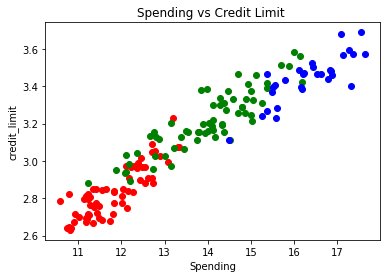

In [114]:
## Visualising the groups

df1 =df[labels==0]
df2 =df[labels==1]
df3 =df[labels==2]


plt.scatter(df1['spending'], df1['credit_limit'], color ='red')
plt.scatter(df2['spending'], df2['credit_limit'], color ='green')
plt.scatter(df3['spending'], df3['credit_limit'], color ='blue')


plt.xlabel("Spending")
plt.ylabel("credit_limit");
plt.title("Spending vs Credit Limit ");

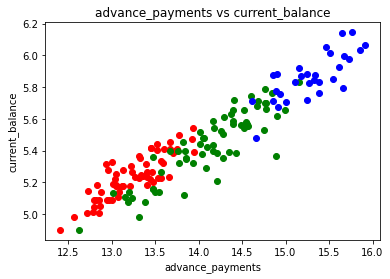

In [115]:
## Visualising the groups

df1 =df[labels==0]
df2 =df[labels==1]
df3 =df[labels==2]


plt.scatter(df1['advance_payments'], df1['current_balance'], color ='red')
plt.scatter(df2['advance_payments'], df2['current_balance'], color ='green')
plt.scatter(df3['advance_payments'], df3['current_balance'], color ='blue')


plt.xlabel("advance_payments")
plt.ylabel("current_balance");
plt.title("advance_payments vs current_balance");

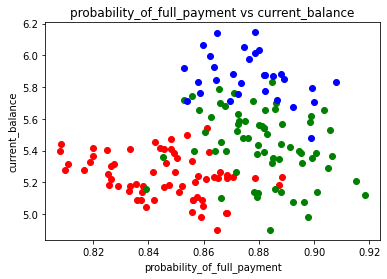

In [116]:
## Visualising the groups

df1 =df[labels==0]
df2 =df[labels==1]
df3 =df[labels==2]


plt.scatter(df1['probability_of_full_payment'], df1['current_balance'], color ='red')
plt.scatter(df2['probability_of_full_payment'], df2['current_balance'], color ='green')
plt.scatter(df3['probability_of_full_payment'], df3['current_balance'], color ='blue')


plt.xlabel("probability_of_full_payment")
plt.ylabel("current_balance");
plt.title("probability_of_full_payment vs current_balance");

#####   Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending
#####   Group 2 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more
#####   Group 3 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)